## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
#combined_data.describe()
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
data_grouped_by_regimen = combined_data.groupby(['Drug Regimen'])
tumor_volume_mean = data_grouped_by_regimen.mean()
#print(tumor_volume_mean)
tumor_volume_median = data_grouped_by_regimen.median()
#print(tumor_volume_median)
tumor_volume_var = data_grouped_by_regimen.var()
#print(tumor_volume_var)
tumor_volume_std = data_grouped_by_regimen.std()
#print(tumor_volume_std)
tumor_volume_sem = data_grouped_by_regimen.sem()
#print(tumor_volume_sem)

summary_statistics_table = pd.DataFrame({"Tumor_Vol Mean": tumor_volume_mean['Tumor Volume (mm3)'],
                                        "Tumor_Vol Median": tumor_volume_median['Tumor Volume (mm3)'],
                                        "Tumor_Vol Variance": tumor_volume_var['Tumor Volume (mm3)'],
                                        "Tumor_Vol Standard Deviation": tumor_volume_var['Tumor Volume (mm3)'],
                                        "Tumor_Vol SEM": tumor_volume_sem['Tumor Volume (mm3)']})
summary_statistics_table

,Tumor_Vol Mean,Tumor_Vol Median,Tumor_Vol Variance,Tumor_Vol Standard Deviation,Tumor_Vol SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,24.947764,0.329346
Ceftamin,52.591172,51.776157,39.290177,39.290177,0.469821
Infubinol,52.884795,51.820584,43.128684,43.128684,0.492236
Ketapril,55.235638,53.698743,68.553577,68.553577,0.603860
Naftisol,54.331565,52.509285,66.173479,66.173479,0.596466
Placebo,54.033581,52.288934,61.168083,61.168083,0.581331
Propriva,52.322552,50.854632,42.351070,42.351070,0.512884
Ramicane,40.216745,40.673236,23.486704,23.486704,0.320955
Stelasyn,54.233149,52.431737,59.450562,59.450562,0.573111


## Bar plots

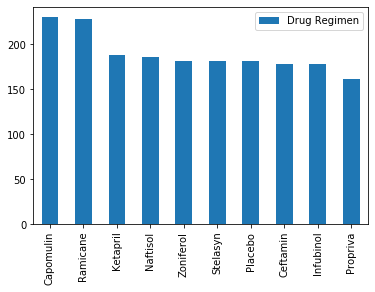

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

regimen_count = combined_data["Drug Regimen"].value_counts()

#drug_regimen = combined_data["Drug Regimen"].unique()
regimen_count_df = pd.DataFrame(regimen_count)
regimen_count_df
regimen_count_df.plot.bar()



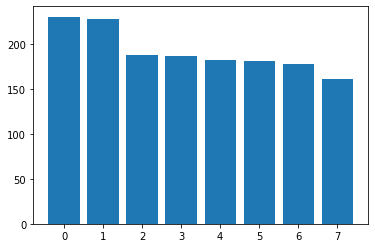

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
#drug_regimen
x_axis = np.arange(len(regimen_count.unique()))
plt.bar(x_axis, regimen_count.unique())
tick_locations = [value for value in x_axis]
#plt.xticks = (tick_locations, drug_regimen)


## Pie plots

Text(108.68, 0.5, 'Sex')

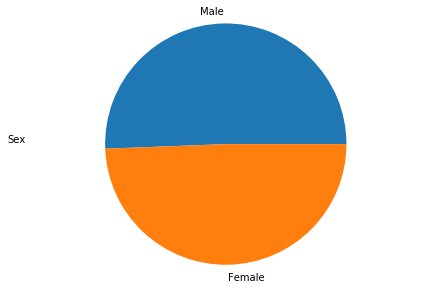

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_count = combined_data["Sex"].value_counts()
sex_count.plot.pie()
plt.tight_layout()
plt.axis("equal")
plt.ylabel("Sex", rotation='horizontal')

Text(0.5, 1.0, 'Male vs Female Distribution')

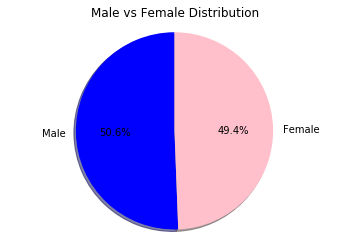

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#sex_count
sex = ["Male", "Female"]
count = [958, 935]
colors = ["blue", "pink"]
#explode = (0.1, 0)
plt.pie(count, labels=sex, colors=colors, autopct="%1.1f%%", shadow=True, startangle = 90)
plt.axis("equal")
plt.title("Male vs Female Distribution")

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Find four most promising treatment regiments
top_four_regimens = summary_statistics_table.sort_values(by="Tumor_Vol Mean", ascending=True)
print(top_four_regimens.head(4))
ramicane_stats = combined_data.loc[(combined_data["Drug Regimen"] == "Ramicane")]
capomulin_stats = combined_data.loc[(combined_data["Drug Regimen"] == "Capomulin")]
propriva_stats = combined_data.loc[(combined_data["Drug Regimen"] == "Propriva")]
ceftamin_stats = combined_data.loc[(combined_data["Drug Regimen"] == "Ceftamin")]

#Final Tumor Vol for Ramicane
final_tumorVol_ramicane = ramicane_stats.groupby('Mouse ID').last()
final_tumorVol_ramicane = final_tumorVol_ramicane[["Tumor Volume (mm3)"]]
final_tumorVol_ramicane = final_tumorVol_ramicane.rename(columns={"Tumor Volume (mm3)":"Final Tumor Vol. Ramicane"})
display(final_tumorVol_ramicane)
#Calculate the IQR for Ramicane
ramicane_vol = final_tumorVol_ramicane['Final Tumor Vol. Ramicane']
ramicane_quartiles = ramicane_vol.quantile([.25,.5,.75])
r_lowerq = ramicane_quartiles[0.25]
r_upperq = ramicane_quartiles[0.75]
ramicane_iqr = r_upperq-r_lowerq
print(f"Ramicane IQR: {ramicane_iqr}")

# Determine Potential Outliers for Ramicane
r_lower_bound = r_lowerq - (1.5*ramicane_iqr)
r_upper_bound = r_upperq + (1.5*ramicane_iqr)
print(f"Values below {r_lower_bound} could be outliers.")
print(f"Values above {r_upper_bound} could be outliers.")
ramicane_low_outliers = final_tumorVol_ramicane.loc[(final_tumorVol_ramicane["Final Tumor Vol. Ramicane"] < 17.912)]
ramicane_upper_outliers = final_tumorVol_ramicane.loc[(final_tumorVol_ramicane["Final Tumor Vol. Ramicane"] > 54.307)]






              Tumor_Vol Mean  Tumor_Vol Median  Tumor_Vol Variance  \
Drug Regimen                                                         
Ramicane           40.216745         40.673236           23.486704   
Capomulin          40.675741         41.557809           24.947764   
Propriva           52.322552         50.854632           42.351070   
Ceftamin           52.591172         51.776157           39.290177   

              Tumor_Vol Standard Deviation  Tumor_Vol SEM  
Drug Regimen                                               
Ramicane                         23.486704       0.320955  
Capomulin                        24.947764       0.329346  
Propriva                         42.351070       0.512884  
Ceftamin                         39.290177       0.469821  


,Final Tumor Vol. Ramicane
Mouse ID,
a411,38.407618
a444,43.047543
a520,38.810366
a644,32.978522
c458,38.342008
c758,33.397653
d251,37.311236
e662,40.659006
g791,29.128472


Ramicane IQR: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [9]:
#Final Tumor Vol for Capomulin
final_tumorVol_capomulin = capomulin_stats.groupby('Mouse ID').last()
final_tumorVol_capomulin = final_tumorVol_capomulin[["Tumor Volume (mm3)"]]
final_tumorVol_capomulin = final_tumorVol_capomulin.rename(columns={"Tumor Volume (mm3)":"Final Tumor Vol. Capomulin"})
display(final_tumorVol_capomulin)
# Calculate IQR
capomulin_vol = final_tumorVol_capomulin['Final Tumor Vol. Capomulin']
capomulin_quartiles = capomulin_vol.quantile([.25,.5,.75])
c_lowerq = capomulin_quartiles[0.25]
c_upperq = capomulin_quartiles[0.75]
capomulin_iqr = c_upperq-c_lowerq
print(f"Capomulin IQR: {capomulin_iqr}")
# Determine Potential Outliers for Capomulin
c_lower_bound = c_lowerq - (1.5*capomulin_iqr)
c_upper_bound = c_upperq + (1.5*capomulin_iqr)
print(f"Values below {c_lower_bound} could be potential outliers.")
print(f"Values above {c_upper_bound} could be potential outliers.")
capomulin_low_outliers = final_tumorVol_capomulin.loc[(final_tumorVol_capomulin["Final Tumor Vol. Capomulin"] < 20.705)]
capomulin_upper_outliers = final_tumorVol_capomulin.loc[(final_tumorVol_capomulin["Final Tumor Vol. Capomulin"] > 51.832)]

,Final Tumor Vol. Capomulin
Mouse ID,
b128,38.982878
b742,38.939633
f966,30.485985
g288,37.074024
g316,40.159220
i557,47.685963
i738,37.311846
j119,38.125164
j246,38.753265


Capomulin IQR: 7.781863460000004
Values below 20.70456164999999 could be potential outliers.
Values above 51.83201549 could be potential outliers.


In [14]:
 #Calculate Final Tumor Volume for Proriva
final_tumorVol_propriva = propriva_stats.groupby('Mouse ID').last()
final_tumorVol_propriva = final_tumorVol_propriva[["Tumor Volume (mm3)"]]
final_tumorVol_propriva = final_tumorVol_propriva.rename(columns={"Tumor Volume (mm3)":"Final Tumor Vol. Propriva"})
display(final_tumorVol_propriva)
# Calculate IQR
propriva_vol = final_tumorVol_propriva['Final Tumor Vol. Propriva']
propriva_quartiles = propriva_vol.quantile([.25,.5,.75])
p_lowerq = propriva_quartiles[0.25]
p_upperq = propriva_quartiles[0.75]
propriva_iqr = p_upperq-p_lowerq
print(f"Propriva IQR: {propriva_iqr}")
# Determine Potential Outliers for Propriva
p_lower_bound = p_lowerq - (1.5*propriva_iqr)
p_upper_bound = p_upperq + (1.5*propriva_iqr)
print(f"Values below {p_lower_bound} are potential outliers.")
print(f"Values above {p_upper_bound} are potential outliers.")
propriva_low_outliers = final_tumorVol_propriva.loc[(final_tumorVol_propriva["Final Tumor Vol. Propriva"] < 28.951)]
propriva_upper_outliers = final_tumorVol_propriva.loc[(final_tumorVol_propriva["Final Tumor Vol. Propriva"] > 82.743)]

,Final Tumor Vol. Propriva
Mouse ID,
a699,62.191414
c927,64.183229
g558,61.774963
g570,70.492788
g989,62.570880
i635,58.633404
k603,50.180109
l215,53.653970
n482,45.000000


Propriva IQR: 13.447910629999996
Values below 28.95110303500001 are potential outliers.
Values above 82.742745555 are potential outliers.


In [16]:
# Calculate Final Tumor Volume for Ceftamin
final_tumorVol_ceftamin = ceftamin_stats.groupby('Mouse ID').last()
final_tumorVol_ceftamin= final_tumorVol_ceftamin[["Tumor Volume (mm3)"]]
final_tumorVol_ceftamin = final_tumorVol_ceftamin.rename(columns={"Tumor Volume (mm3)":"Final Tumor Vol. Ceftamin"})
display(final_tumorVol_ceftamin)
# Calculate Ceftamin IQR
ceftamin_vol= final_tumorVol_ceftamin['Final Tumor Vol. Ceftamin']
ceftamin_quartiles = ceftamin_vol.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq
print(f"Ceftamin IQR: {ceftamin_iqr}")
# Determine Potential Outliers for Ceftamin
ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)
print(f"Values below {ceftamin_lower_bound} are potential outliers.")
print(f"Values above {ceftamin_upper_bound} are potential outliers.")
ceftamin_low_outliers = final_tumorVol_ceftamin.loc[(final_tumorVol_ceftamin["Final Tumor Vol. Ceftamin"] < 28.550)]
ceftamin_upper_outliers = final_tumorVol_ceftamin.loc[(final_tumorVol_ceftamin["Final Tumor Vol. Ceftamin"] > 84.472)]

,Final Tumor Vol. Ceftamin
Mouse ID,
a275,62.999356
b447,45.000000
b487,56.057749
b759,55.742829
f436,48.722078
h531,47.784682
j296,61.849023
k210,68.923185
l471,67.748662


Ceftamin IQR: 15.577752179999997
Values below 25.355449580000002 are potential outliers.
Values above 87.66645829999999 are potential outliers.


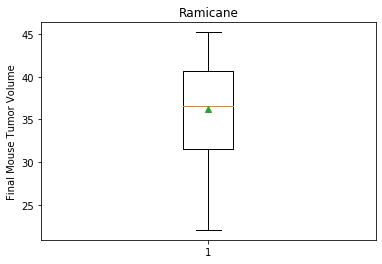

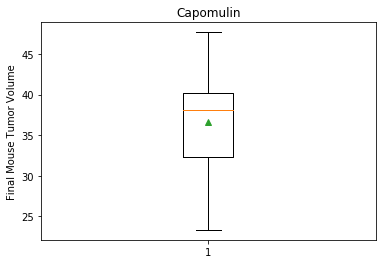

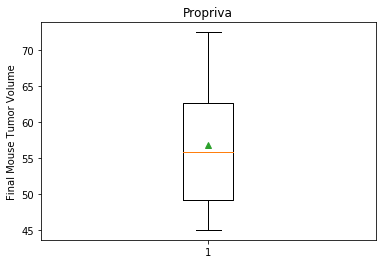

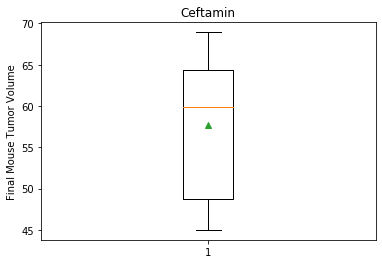

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Ramicane Box Plot
fig1, ax1 = plt.subplots()
ax1.set_title('Ramicane')
ax1.set_ylabel('Final Mouse Tumor Volume')
ax1.boxplot(ramicane_vol,showmeans=True)
plt.show()
# Capomulin Box Plot
fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin')
ax1.set_ylabel('Final Mouse Tumor Volume')
ax1.boxplot(capomulin_vol,showmeans=True)
plt.show()
# Propriva Box Plot
fig1, ax1 = plt.subplots()
ax1.set_title('Propriva')
ax1.set_ylabel('Final Mouse Tumor Volume')
ax1.boxplot(propriva_vol,showmeans=True)
plt.show()
# Ceftamin Box Plot
fig1, ax1 = plt.subplots()
ax1.set_title('Ceftamin')
ax1.set_ylabel('Final Mouse Tumor Volume')
ax1.boxplot(ceftamin_vol,showmeans=True)
plt.show()


## Line and scatter plots

Text(0.5, 0, 'Timepoint')

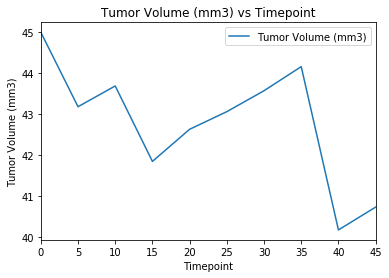

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_stats= combined_data.loc[(combined_data["Drug Regimen"] == "Capomulin")]
# mouse s710
mouse_s710 = capomulin_stats.loc[(capomulin_stats["Mouse ID"] == "s710")]
# Timepoint & Tumor Volume
mouse_s710 = mouse_s710[["Timepoint","Tumor Volume (mm3)"]]
# Line Plot of Timepoint and Tumor Volume
mouse_s710.plot.line(x='Timepoint', y='Tumor Volume (mm3)')
plt.title("Tumor Volume (mm3) vs Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")

Text(0.5, 0, 'Average Tumor Volume (mm3)')

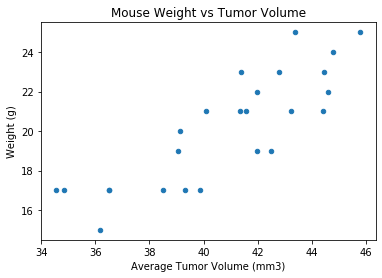

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_stats= combined_data.loc[(combined_data["Drug Regimen"] == "Capomulin")]
# average tumor volume 
avg_tumorVol = capomulin_stats.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]
# mouse weight
mouse_weight = capomulin_stats.groupby("Mouse ID").mean()["Weight (g)"]
weight_volume = pd.merge(avg_tumorVol, mouse_weight, how="left", on=["Mouse ID"])
weight_volume.plot.scatter(x='Tumor Volume (mm3)', y='Weight (g)')
plt.title("Mouse Weight vs Tumor Volume")
plt.ylabel("Weight (g)")
plt.xlabel("Average Tumor Volume (mm3)")

In [20]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = weight_volume['Tumor Volume (mm3)']
y_values = weight_volume['Weight (g)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(41,17),fontsize=15,color="red")
plt.title("Mouse Weight vs Tumor Volume")
plt.ylabel("Weight (g)")
plt.xlabel("Average Tumor Volume (mm3)")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between Tumor Volume (mm3) and Weight (g) is {round(correlation[0],2)}.")

NameError: name 'linregress' is not defined